In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
import os

dataset_dir = "../data/house_plant_species"  

classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

class_counts = {}
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    class_counts[cls] = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])

print("Image counts per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print("\n✅ Total images in dataset:", sum(class_counts.values()))


Image counts per class:
African Violet (Saintpaulia ionantha): 334
Aloe Vera: 247
Anthurium (Anthurium andraeanum): 451
Areca Palm (Dypsis lutescens): 189
Asparagus Fern (Asparagus setaceus): 168
Begonia (Begonia spp.): 234
Bird of Paradise (Strelitzia reginae): 179
Birds Nest Fern (Asplenium nidus): 290
Boston Fern (Nephrolepis exaltata): 303
Calathea: 329
Cast Iron Plant (Aspidistra elatior): 266
Chinese evergreen (Aglaonema): 511
Chinese Money Plant (Pilea peperomioides): 381
Christmas Cactus (Schlumbergera bridgesii): 310
Chrysanthemum: 208
Ctenanthe: 339
Daffodils (Narcissus spp.): 420
Dracaena: 260
Dumb Cane (Dieffenbachia spp.): 541
Elephant Ear (Alocasia spp.): 331
English Ivy (Hedera helix): 240
Hyacinth (Hyacinthus orientalis): 316
Iron Cross begonia (Begonia masoniana): 263
Jade plant (Crassula ovata): 349
Kalanchoe: 130
Lilium (Hemerocallis): 475
Lily of the valley (Convallaria majalis): 409
Money Tree (Pachira aquatica): 356
Monstera Deliciosa (Monstera deliciosa): 544
Orc

In [5]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy


   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ----- ---------------------------------- 5.8/41.3 MB 32.2 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/41.3 MB 19.7 MB/s eta 0:00:02
   ------- -------------------------------- 8.1/41.3 MB 14.4 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/41.3 MB 11.0 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/41.3 MB 9.2 MB/s eta 0:00:04
   ---------- ----------------------------- 10.5/41.3 MB 8.6 MB/s eta 0:00:04
   ----------- ---------------------------- 12.1/41.3 MB 8.4 MB/s eta 0:00:04
   ------------- -------------------------- 14.2/41.3 MB 8.5 MB/s eta 0:00:04
   --------------- ------------------------ 16.0/41.3 MB 8.7 MB/s eta 0:00:03
   ----------------- ---------------------- 17.8/41.3 MB 8.6 MB/s eta 0:00:03
   ------------------- -------------------- 20.2/41.3 MB 8.9 MB/s eta 0:00:03
   --------------------- ------------------ 22.3/41.3 MB 8.9 MB/s eta 0:0

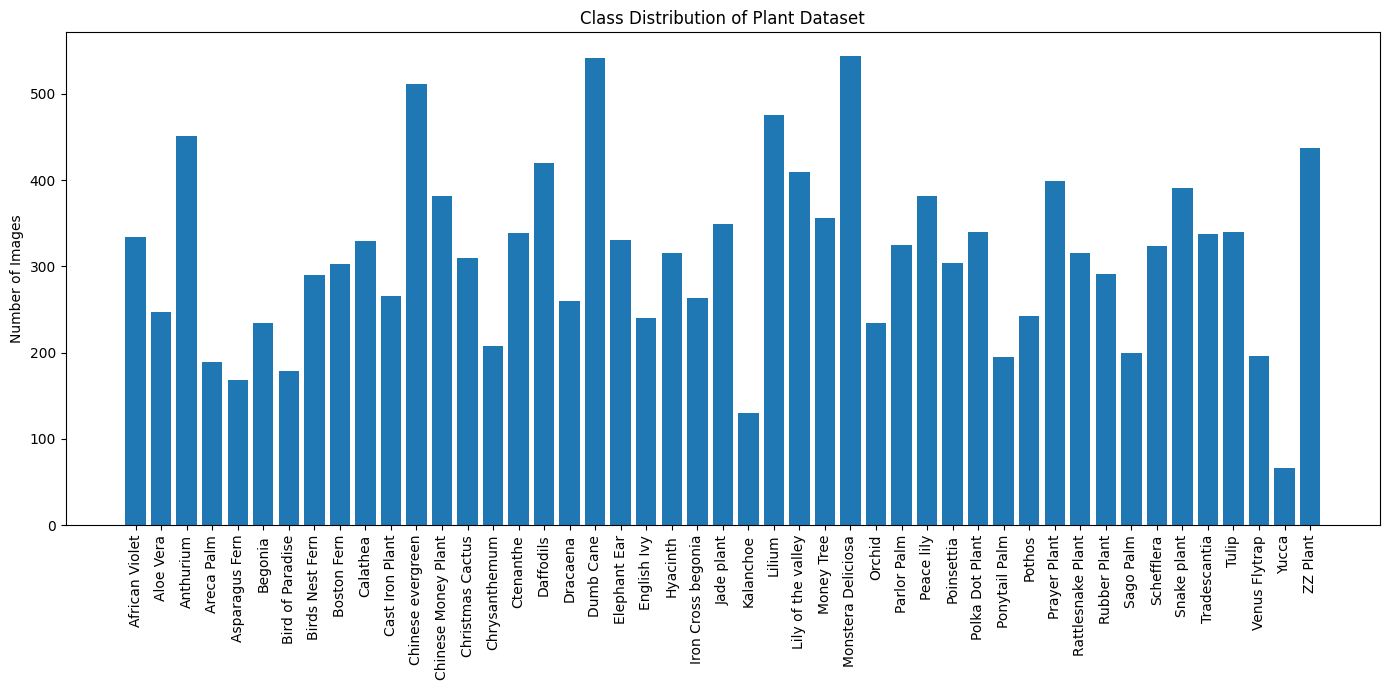

In [3]:
import matplotlib.pyplot as plt

# Your counts (you can paste directly from your output)
class_counts = {
    "African Violet": 334,
    "Aloe Vera": 247,
    "Anthurium": 451,
    "Areca Palm": 189,
    "Asparagus Fern": 168,
    "Begonia": 234,
    "Bird of Paradise": 179,
    "Birds Nest Fern": 290,
    "Boston Fern": 303,
    "Calathea": 329,
    "Cast Iron Plant": 266,
    "Chinese evergreen": 511,
    "Chinese Money Plant": 381,
    "Christmas Cactus": 310,
    "Chrysanthemum": 208,
    "Ctenanthe": 339,
    "Daffodils": 420,
    "Dracaena": 260,
    "Dumb Cane": 541,
    "Elephant Ear": 331,
    "English Ivy": 240,
    "Hyacinth": 316,
    "Iron Cross begonia": 263,
    "Jade plant": 349,
    "Kalanchoe": 130,
    "Lilium": 475,
    "Lily of the valley": 409,
    "Money Tree": 356,
    "Monstera Deliciosa": 544,
    "Orchid": 234,
    "Parlor Palm": 325,
    "Peace lily": 381,
    "Poinsettia": 304,
    "Polka Dot Plant": 340,
    "Ponytail Palm": 195,
    "Pothos": 242,
    "Prayer Plant": 399,
    "Rattlesnake Plant": 315,
    "Rubber Plant": 291,
    "Sago Palm": 199,
    "Schefflera": 323,
    "Snake plant": 391,
    "Tradescantia": 338,
    "Tulip": 340,
    "Venus Flytrap": 196,
    "Yucca": 66,
    "ZZ Plant": 437,
}

# Plot
plt.figure(figsize=(14,7))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Class Distribution of Plant Dataset")
plt.tight_layout()
plt.show()


In [2]:
import os
import random
import shutil
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Input dataset path (original dataset)
input_dir = "../data/house_plant_species"   # structure: dataset/class_name/*.jpg

# Output dataset path (balanced dataset)
output_dir = "balanced_dataset"

# Target number of images per class
target_count = 350

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Define augmentation generator
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Get all class folders
classes = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

# Balance dataset
for cls in tqdm(classes, desc="Balancing classes"):
    cls_path = os.path.join(input_dir, cls)
    images = os.listdir(cls_path)

    # Make new class folder in output dir
    out_cls_path = os.path.join(output_dir, cls)
    os.makedirs(out_cls_path, exist_ok=True)

    # Copy original images first
    for img in images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(out_cls_path, img)
        shutil.copy(src, dst)

    current_count = len(images)

    # If fewer than target_count, augment until we reach target
    if current_count < target_count:
        extra_needed = target_count - current_count
        i = 0
        while i < extra_needed:
            img_name = random.choice(images)
            img_path = os.path.join(cls_path, img_name)

            # Load image
            img = load_img(img_path)  
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Generate augmented image
            aug_iter = datagen.flow(x, batch_size=1)
            aug_img = next(aug_iter)[0].astype("uint8")

            # Save augmented image
            new_name = f"aug_{i}_{img_name}"
            array_to_img(aug_img).save(os.path.join(out_cls_path, new_name))
            i += 1

    # If more than target_count, just keep all (no downsampling)
    # → Can add downsampling option if needed

print("\n✅ Dataset balancing complete!")
print(f"Each class now has at least {target_count} images (small classes upsampled).")


Balancing classes:   6%|█████████▉                                                                                                                                                 | 3/47 [00:52<12:25, 16.94s/it]D:\anaconda\ana\envs\tf\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Balancing classes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [19:41<00:00, 25.15s/it]


✅ Dataset balancing complete!
Each class now has at least 350 images (small classes upsampled).


In [ ]:
import os
dataset_dir = "balanced_dataset"  


classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]


class_counts = {}
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    class_counts[cls] = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])

print("Image counts per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print("\n✅ Total images in dataset:", sum(class_counts.values()))


Image counts per class:
African Violet (Saintpaulia ionantha): 350
Aloe Vera: 350
Anthurium (Anthurium andraeanum): 451
Areca Palm (Dypsis lutescens): 350
Asparagus Fern (Asparagus setaceus): 350
Begonia (Begonia spp.): 350
Bird of Paradise (Strelitzia reginae): 350
Birds Nest Fern (Asplenium nidus): 350
Boston Fern (Nephrolepis exaltata): 350
Calathea: 350
Cast Iron Plant (Aspidistra elatior): 350
Chinese evergreen (Aglaonema): 511
Chinese Money Plant (Pilea peperomioides): 381
Christmas Cactus (Schlumbergera bridgesii): 350
Chrysanthemum: 350
Ctenanthe: 350
Daffodils (Narcissus spp.): 420
Dracaena: 350
Dumb Cane (Dieffenbachia spp.): 541
Elephant Ear (Alocasia spp.): 350
English Ivy (Hedera helix): 350
Hyacinth (Hyacinthus orientalis): 350
Iron Cross begonia (Begonia masoniana): 350
Jade plant (Crassula ovata): 350
Kalanchoe: 350
Lilium (Hemerocallis): 475
Lily of the valley (Convallaria majalis): 409
Money Tree (Pachira aquatica): 356
Monstera Deliciosa (Monstera deliciosa): 544
Orc